In [2]:
from pandas import read_excel, merge
from numpy import arange
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/resources/data/mypro57ex_csv.csv')
df.head()

,DeviceID,Location,Associated
0,00:08:22:05:35:26,FLOOR 3>Phu Fa,1
1,00:08:22:1c:c0:fb,FLOOR 1>Adidas,1
2,00:08:22:1c:c0:fb,FLOOR 2>201,1
3,00:08:22:1c:c0:fb,FLOOR 1>Adidas,1
4,00:08:22:1c:c0:fb,FLOOR 1>Adidas,1


In [5]:
df['DeviceID'] = df['DeviceID'].astype('str')

In [6]:
cluster = (df
          .groupby(['DeviceID', 'Location'])['Associated']
          .sum().unstack().reset_index().fillna(0)
          .set_index('DeviceID'))

In [7]:
cluster.head()

Location,FLOOR 1>Adidas,FLOOR 1>Alpha Runner,FLOOR 1>Asics,FLOOR 1>CAZH,FLOOR 1>Converse,FLOOR 1>Lacoste,FLOOR 1>Nike,FLOOR 1>Palladium,FLOOR 1>Street Lab1,FLOOR 1>Street Lab2,...,FLOOR M>His Lab2,FLOOR M>His Lab3,FLOOR M>His Lab4,FLOOR M>His Lab5,FLOOR M>Issey Miyake,FLOOR M>M04,FLOOR M>Pursuit,FLOOR M>Rimowa,FLOOR M>Skin Lab,FLOOR M>Social Discovery
DeviceID,,,,,,,,,,,,,,,,,,,,,
00:08:22:05:35:26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08:22:06:b8:fb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08:22:06:d6:fb,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08:22:08:3d:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08:22:0e:ba:fb,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
table = cluster.applymap(encode_units)

In [8]:
table.head()

Location,FLOOR 1>Adidas,FLOOR 1>Alpha Runner,FLOOR 1>Asics,FLOOR 1>CAZH,FLOOR 1>Converse,FLOOR 1>Lacoste,FLOOR 1>Nike,FLOOR 1>Palladium,FLOOR 1>Street Lab1,FLOOR 1>Street Lab2,...,FLOOR M>His Lab2,FLOOR M>His Lab3,FLOOR M>His Lab4,FLOOR M>His Lab5,FLOOR M>Issey Miyake,FLOOR M>M04,FLOOR M>Pursuit,FLOOR M>Rimowa,FLOOR M>Skin Lab,FLOOR M>Social Discovery
DeviceID,,,,,,,,,,,,,,,,,,,,,
00:08:22:05:35:26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:06:b8:fb,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
00:08:22:06:d6:fb,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
00:08:22:08:3d:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:0e:ba:fb,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
table

Location,FLOOR 1>Adidas,FLOOR 1>Alpha Runner,FLOOR 1>Asics,FLOOR 1>CAZH,FLOOR 1>Converse,FLOOR 1>Lacoste,FLOOR 1>Nike,FLOOR 1>Palladium,FLOOR 1>Street Lab1,FLOOR 1>Street Lab2,...,FLOOR M>His Lab2,FLOOR M>His Lab3,FLOOR M>His Lab4,FLOOR M>His Lab5,FLOOR M>Issey Miyake,FLOOR M>M04,FLOOR M>Pursuit,FLOOR M>Rimowa,FLOOR M>Skin Lab,FLOOR M>Social Discovery
DeviceID,,,,,,,,,,,,,,,,,,,,,
00:08:22:05:35:26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:06:b8:fb,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
00:08:22:06:d6:fb,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
00:08:22:08:3d:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:0e:ba:fb,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
00:08:22:1c:c0:fb,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
00:08:22:3c:31:fc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:48:19:3a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:08:22:4a:39:0a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
cols = table.columns[1:]

In [11]:
cols

Index(['FLOOR 1>Alpha Runner', 'FLOOR 1>Asics', 'FLOOR 1>CAZH',
       'FLOOR 1>Converse', 'FLOOR 1>Lacoste', 'FLOOR 1>Nike',
       'FLOOR 1>Palladium', 'FLOOR 1>Street Lab1', 'FLOOR 1>Street Lab2',
       'FLOOR 1>Street Lab3', 'FLOOR 1>Street Lab4', 'FLOOR 1>Street Lab5',
       'FLOOR 1>The North Face', 'FLOOR 1>Vans', 'FLOOR 2>201',
       'FLOOR 2>Bee(F&B)', 'FLOOR 2>Big Camera', 'FLOOR 2>Billboard',
       'FLOOR 2>Digital Lab1', 'FLOOR 2>Digital Lab2', 'FLOOR 2>Digital Lab3',
       'FLOOR 2>Digital Lab4', 'FLOOR 2>Drone', 'FLOOR 2>Flight001',
       'FLOOR 2>Loft', 'FLOOR 2>Rubbers', 'FLOOR 2>Starbucks',
       'FLOOR 2>iStudio', 'FLOOR 2>sdgreeting2', 'FLOOR 3>Amway',
       'FLOOR 3>Boots', 'FLOOR 3>Cafe Now', 'FLOOR 3>Creative Lab1',
       'FLOOR 3>Creative Lab2', 'FLOOR 3>Creative Lab3',
       'FLOOR 3>Creative Lab4', 'FLOOR 3>Creative Lab5',
       'FLOOR 3>Creative Lab6', 'FLOOR 3>Habitat', 'FLOOR 3>Hay',
       'FLOOR 3>K.A. Jewelry', 'FLOOR 3>ODS', 'FLOOR 3>Phu Fa',


In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [ 2, 3, 4, 5 , 6, 7, 8 ]

for n_clusters in range_n_clusters:

    cluster = KMeans(n_clusters=n_clusters,random_state = 10)
    table["cluster"] = cluster.fit_predict(table[table.columns[2:]])

    silhouette_avg = silhouette_score(table[table.columns[2:]], table["cluster"])
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.266541414326
For n_clusters = 3 The average silhouette_score is : 0.185003075128
For n_clusters = 4 The average silhouette_score is : 0.290361594436
For n_clusters = 5 The average silhouette_score is : 0.229503398606
For n_clusters = 6 The average silhouette_score is : 0.284168352865
For n_clusters = 7 The average silhouette_score is : 0.263067488139
For n_clusters = 8 The average silhouette_score is : 0.275611281643


In [23]:
import matplotlib.pyplot as plt
import numpy as np
s = [0.266541414326,0.185003075128,0.290361594436,0.229503398606,0.284168352865,0.263067488139,0.275611281643]
k=[2,3,4,5,6,7,8]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k,s,'b*-')
ax.plot(k[np.argmax(s)], s[np.argmax(s)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.ylabel("Silouette Score")
plt.xlabel("Number of clusters")
plt.title("Silouette for KMeans clustering")
plt.show()




In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = table[table.columns[2:]]
def silhouette(data, n):
	k=range(2,n)
	s = []
	for n_clusters in k:
		clusters = KMeans(n_clusters = n_clusters,init = 'k-means++')
		clusters.fit(data)
		labels = clusters.labels_
		centroids = clusters.cluster_centers_
		s.append(silhouette_score(data, labels, metric='euclidean'))
		print("Silhouette Coefficient for k == %s: %s" % (
		n_clusters, round(silhouette_score(data, clusters.labels_), 4)))
    fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.plot(k,s,'b*-')
	ax.plot(k[np.argmax(s)], s[np.argmax(s)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
	plt.ylabel("Silouette Score")
	plt.xlabel("Number of clusters")
	plt.title("Silouette for KMeans clustering")
	plt.show()


IndentationError: unindent does not match any outer indentation level (<ipython-input-16-8921c5a9d2b6>, line 17)

In [13]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(table[table.columns[2:]], table["cluster"])

<IPython.core.display.Javascript object>


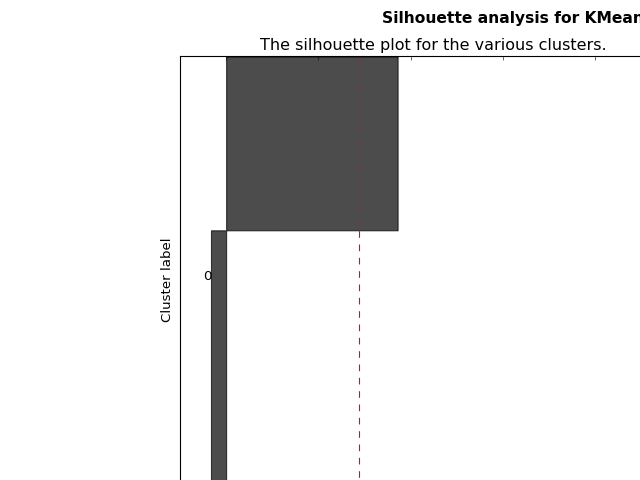

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:31: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


<IPython.core.display.Javascript object>


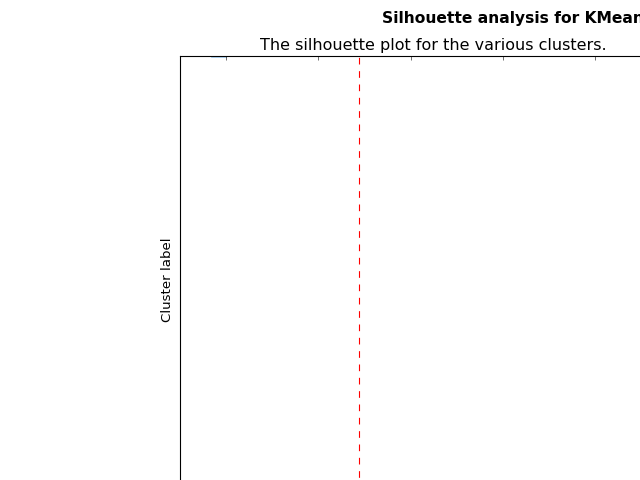

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:31: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


<IPython.core.display.Javascript object>


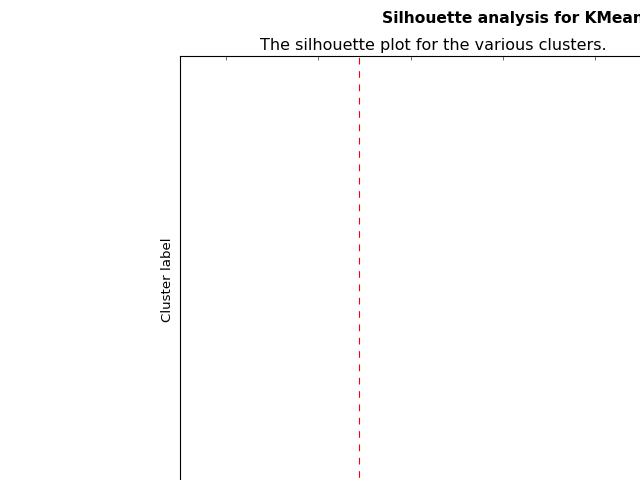

<IPython.core.display.Javascript object>


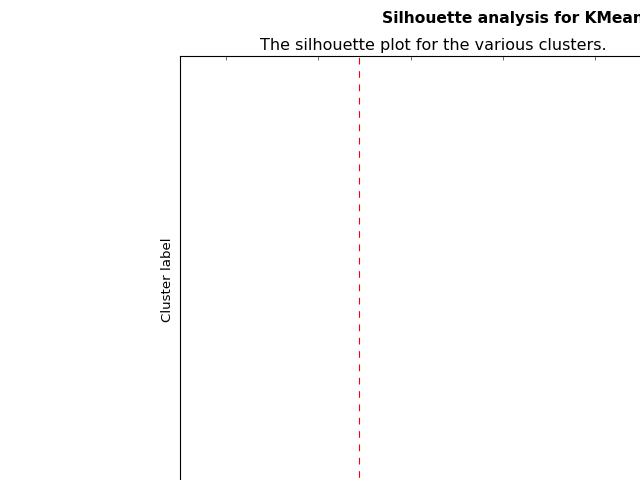

In [14]:


from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
clusterer = cluster
X = table[table.columns[2:]]
y_lower = 10
cluster_labels = table["cluster"]
for i in range(n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 2], X.values[:, 3], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

<IPython.core.display.Javascript object>


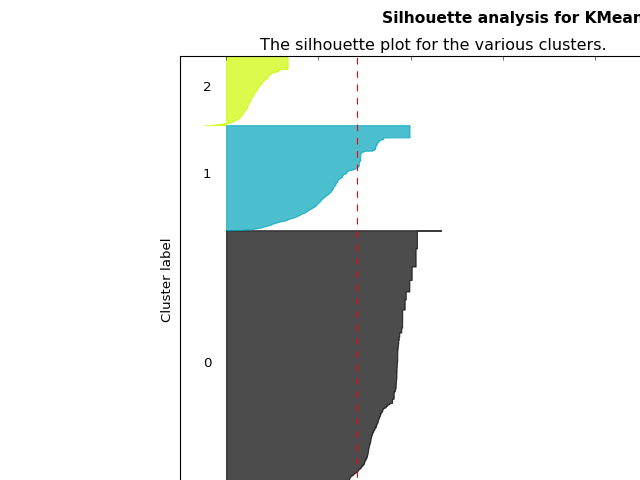

For n_clusters = 3 The average silhouette_score is : 0.284444438447


<IPython.core.display.Javascript object>


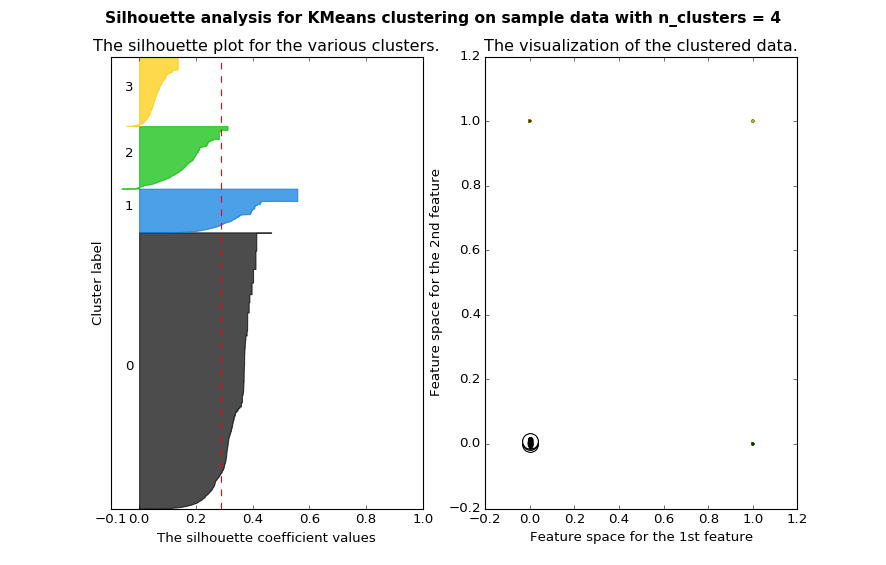

For n_clusters = 4 The average silhouette_score is : 0.289082439097


In [16]:
range_n_clusters = [3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [1]:
range_n_clusters = [11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

NameError: name 'plt' is not defined

In [ ]:
range_n_clusters = [14]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()